# Training

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models
import pandas as pd
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
#@title Hyperparameters
learning_rate = 0.01
batch_size = 32
total_epochs = 30
output_features = 44

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
#@title setup data loader
# Transformations of images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

#load data
train_dataset = ImageFolder('./train', transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
len(train_dataloader.dataset)

2288

In [7]:
#@title Load Model
model = models.resnet18(weights='IMAGENET1K_V1')
model.fc = nn.Linear(model.fc.in_features, output_features)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
train_losses, train_accuracies = [], []

In [9]:
#@title Training loop

for epoch in range(total_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    train_predictions, train_labels = [], []

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        predictions = model(images)
        loss = criterion(predictions, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track loss
        running_loss += loss.item()

        # Store predictions and labels for accuracy calculation
        _, predicted = torch.max(predictions, 1)
        train_predictions.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate training metrics
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)

    epoch_loss = running_loss / len(train_dataloader)
    train_losses.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{total_epochs}], Loss: {epoch_loss:.4f}")   

Epoch [1/30], Loss: 4.4722
Epoch [2/30], Loss: 3.6869
Epoch [3/30], Loss: 3.4594
Epoch [4/30], Loss: 3.3885
Epoch [5/30], Loss: 3.3135
Epoch [6/30], Loss: 3.2424
Epoch [7/30], Loss: 3.1465
Epoch [8/30], Loss: 3.0036
Epoch [9/30], Loss: 2.7659
Epoch [10/30], Loss: 2.4076
Epoch [11/30], Loss: 2.0897
Epoch [12/30], Loss: 1.8793
Epoch [13/30], Loss: 1.6699
Epoch [14/30], Loss: 1.5388
Epoch [15/30], Loss: 1.5228
Epoch [16/30], Loss: 1.3740
Epoch [17/30], Loss: 1.2847
Epoch [18/30], Loss: 1.3142
Epoch [19/30], Loss: 1.1572
Epoch [20/30], Loss: 1.1710
Epoch [21/30], Loss: 1.0034
Epoch [22/30], Loss: 0.9252
Epoch [23/30], Loss: 0.9930
Epoch [24/30], Loss: 0.8623
Epoch [25/30], Loss: 0.8173
Epoch [26/30], Loss: 0.7300
Epoch [27/30], Loss: 0.6758
Epoch [28/30], Loss: 0.6152
Epoch [29/30], Loss: 0.5830
Epoch [30/30], Loss: 0.5237


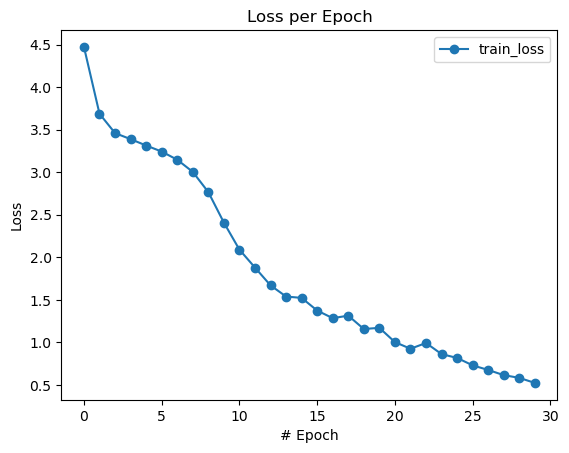

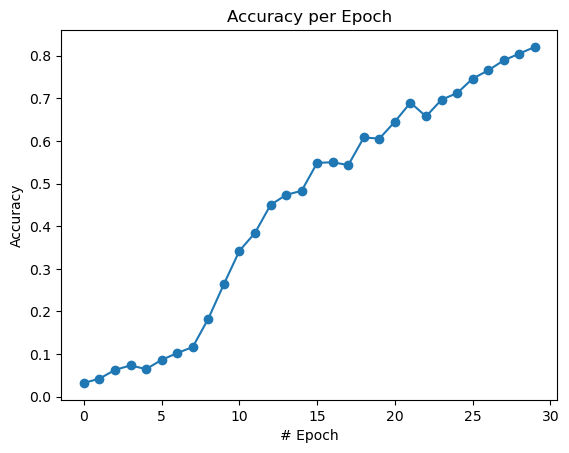

In [10]:
def plot_loss(num_epochs, losses):
    epochs = np.arange(0,num_epochs)
    plt.plot(epochs, losses, '-o', label='train_loss')
    plt.title('Loss per Epoch')
    plt.xlabel('# Epoch')
    plt.ylabel('Loss')
    plt.grid(False)
    plt.legend()
    plt.show()

def plot_accuracy(num_epochs, accuracies):
    epochs = np.arange(0,num_epochs)
    plt.plot(epochs, accuracies, '-o')
    plt.title('Accuracy per Epoch')
    plt.xlabel('# Epoch')
    plt.ylabel('Accuracy')
    plt.grid(False)
    plt.show()
plot_loss(total_epochs, train_losses)
plot_accuracy(total_epochs, train_accuracies)

# Testing

In [11]:
#load data
test_dataset = ImageFolder('./test', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
len(test_dataloader.dataset)

528

In [12]:
import torch
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
def plot_confusion_matrix(true_labels, pred_labels, class_names):
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(10, 9))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


In [14]:
def test_model(model, test_loader, device, class_names):
    model.eval()
    test_predictions = []
    test_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            # Get model outputs and predictions
            predictions = model(images)
            _, predicted = torch.max(predictions, 1)

            # Collect predictions, and labels
            test_predictions.extend(predicted.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())

    
    print(accuracy_score(test_labels, test_predictions))

    # Plot confusion matrix
    plot_confusion_matrix(test_labels, test_predictions, class_names=class_names)

0.3352272727272727


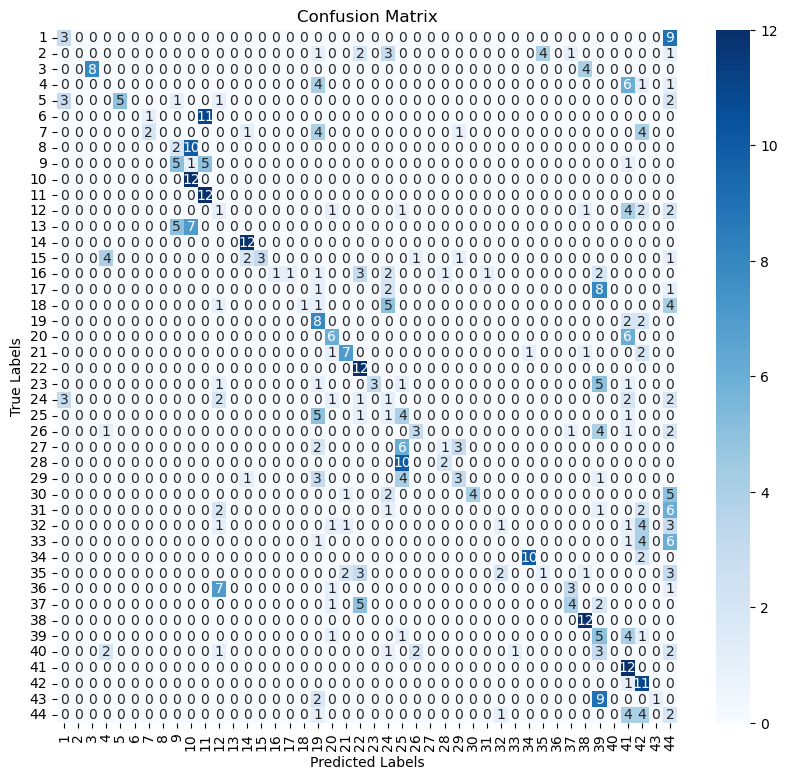

In [15]:
class_numbers = np.arange(1,45,dtype=int)
class_names = class_numbers.astype(str)
test_model(model, test_dataloader, device, class_names)